In [1]:
import pandas as pd
import os
from tqdm import tqdm

# Define the file path
folder_path = r'D:\Research\Phong\ToolTrackingPJ_Project\centroid'

# List all files in the folder
file_names = os.listdir(folder_path)

# Initialize a dictionary to store class ID counts across all files
class_id_counts = {}

# Loop through each file
for file_name in tqdm(file_names, desc='Processing csv files'):
    if file_name.endswith('.csv'):
        # Read the CSV file
        df = pd.read_csv(os.path.join(folder_path, file_name))

        # # Assuming 'centroid' contains tuples as strings, convert them to actual tuples
        # df['centroid'] = df['centroid'].apply(lambda x: tuple(round(float(coord), 4) for coord in x.strip('()').split(',')))

        # # Filter based on 'Class ID'
        # classID_df = df[df['Class ID'] == 0]

        # # Get the right hand tool
        # filtered_df = classID_df[classID_df['centroid'].apply(lambda x: x[0] > 0.5)]

        # Count occurrences of each 'Class ID' in the filtered DataFrame
        class_id_counts_file = df['Class ID'].value_counts().to_dict()

        # Update overall class ID counts with counts from current file
        for class_id, count in class_id_counts_file.items():
            if class_id in class_id_counts:
                class_id_counts[class_id] += count
            else:
                class_id_counts[class_id] = count

# Print the overall counts of each 'Class ID' across all files
print("Overall Class ID Counts:")
for class_id, count in class_id_counts.items():
    print(f"Class ID {class_id}: {count}")


Processing csv files: 100%|██████████| 60/60 [00:13<00:00,  4.42it/s]

Overall Class ID Counts:
Class ID 0: 6052085
Class ID 1: 4049259
Class ID 2: 3538723
Class ID 6: 1135331
Class ID 7: 1395601
Class ID 15: 538809
Class ID 8: 535784
Class ID 11: 532135
Class ID 14: 118202
Class ID 9: 165949
Class ID 13: 75145
Class ID 10: 78077
Class ID 12: 50389


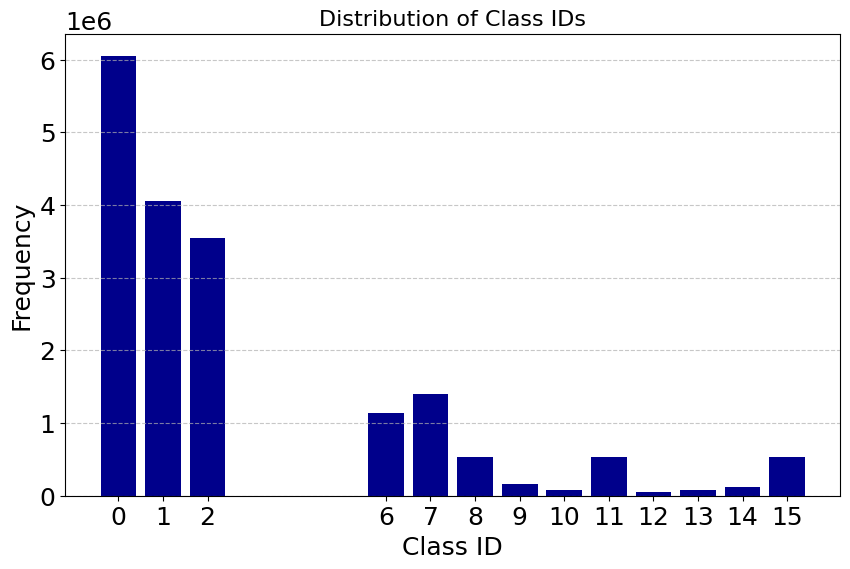

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Overall Class ID Counts
class_id_counts = {
  0: 6052085,
  1: 4049259,
  2: 3538723,
  6: 1135331,
  7: 1395601,
  15: 538809,
  8: 535784,
  11: 532135,
  14: 118202,
  9: 165949,
  13: 75145,
  10: 78077,
  12: 50389,
}

# Extract Class IDs and corresponding counts
class_ids = list(class_id_counts.keys())
counts = list(class_id_counts.values())

# Increase font size by a factor of 1.5
mpl.rcParams.update({'font.size': 12})  # Default font size
mpl.rcParams['axes.labelsize'] = 12 * 1.5
mpl.rcParams['axes.titlesize'] = 14 * 1.5
mpl.rcParams['xtick.labelsize'] = 12 * 1.5
mpl.rcParams['ytick.labelsize'] = 12 * 1.5

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_ids, counts, color='darkblue')
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Distribution of Class IDs', fontsize=16)
plt.xticks(class_ids)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Processing csv files: 100%|██████████| 60/60 [00:54<00:00,  1.11it/s]


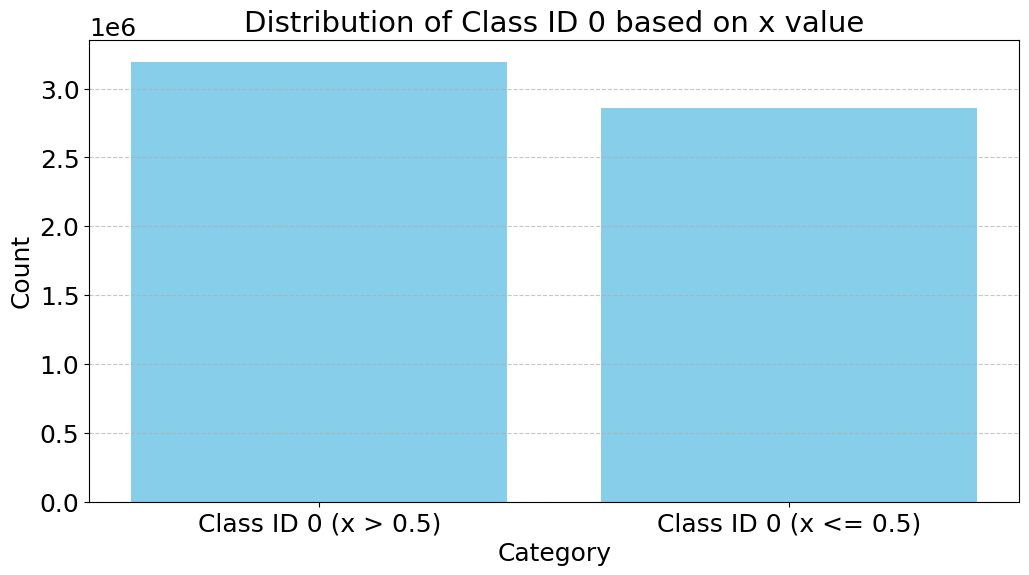

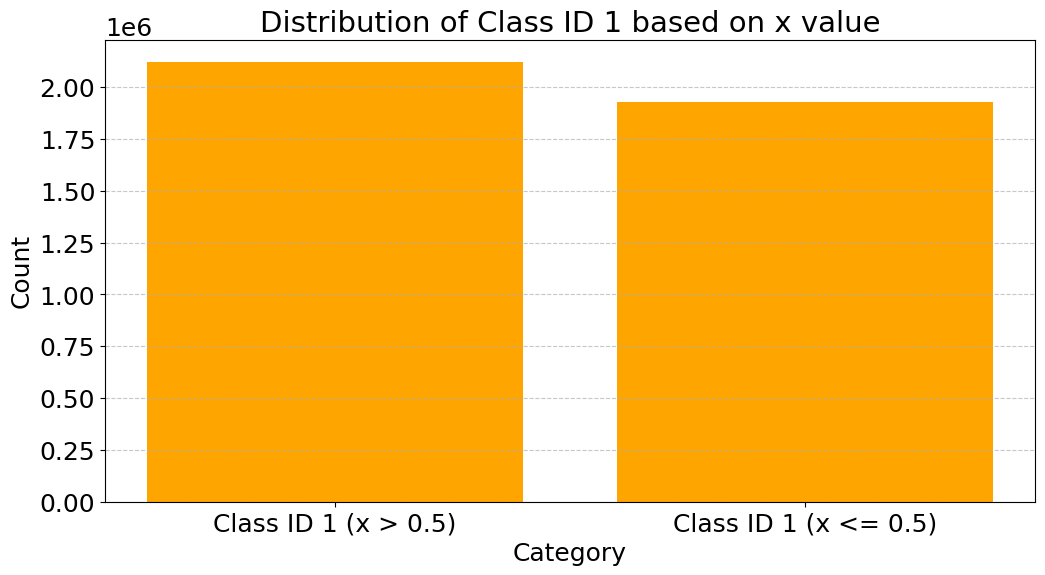

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the file path
folder_path = r'D:\Research\Phong\ToolTrackingPJ_Project\centroid'

# Initialize dictionaries to store counts based on 'Class ID' and 'x' values
class0_counts = {'left': 0, 'right': 0}
class1_counts = {'left': 0, 'right': 0}

# Loop through each file
for file_name in tqdm(os.listdir(folder_path), desc='Processing csv files'):
    if file_name.endswith('.csv'):
        # Read the CSV file
        df = pd.read_csv(os.path.join(folder_path, file_name))

        # Convert 'centroid' column to tuples of floats
        df['centroid'] = df['centroid'].apply(lambda x: tuple(map(float, x.strip('()').split(','))))

        # Filter based on 'Class ID' and 'x' value
        class0_filtered_left = df[(df['Class ID'] == 0) & (df['centroid'].apply(lambda x: x[0] > 0.5))]
        class0_filtered_right = df[(df['Class ID'] == 0) & (df['centroid'].apply(lambda x: x[0] <= 0.5))]
        class1_filtered_left = df[(df['Class ID'] == 1) & (df['centroid'].apply(lambda x: x[0] > 0.5))]
        class1_filtered_right = df[(df['Class ID'] == 1) & (df['centroid'].apply(lambda x: x[0] <= 0.5))]

        # Count occurrences for Class ID 0 with x > 0.5
        class0_counts['left'] += len(class0_filtered_left)
        # Count occurrences for Class ID 0 with x <= 0.5
        class0_counts['right'] += len(class0_filtered_right)
        # Count occurrences for Class ID 1 with x > 0.5
        class1_counts['left'] += len(class1_filtered_left)
        # Count occurrences for Class ID 1 with x <= 0.5
        class1_counts['right'] += len(class1_filtered_right)

# Plotting the distribution for Class ID 0
plt.figure(figsize=(12, 6))
plt.bar(['Class ID 0 (x > 0.5)', 'Class ID 0 (x <= 0.5)'], [class0_counts['left'], class0_counts['right']], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Class ID 0 based on x value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the distribution for Class ID 1
plt.figure(figsize=(12, 6))
plt.bar(['Class ID 1 (x > 0.5)', 'Class ID 1 (x <= 0.5)'], [class1_counts['left'], class1_counts['right']], color='orange')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Class ID 1 based on x value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
